In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_dropout_model(dropout_rate=0.2):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model
dropout_model = create_dropout_model(dropout_rate=0.2)
optimizer = Adam(learning_rate=0.001)
dropout_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
dropout_history = dropout_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)
dropout_eval = dropout_model.evaluate(X_test, y_test, verbose=0)
print("Dropout Model - Loss: {:.4f}, Accuracy: {:.4f}".format(dropout_eval[0], dropout_eval[1]))

Dropout Model - Loss: 0.5336, Accuracy: 0.8300


In [2]:
def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.001, clipnorm=clip_norm)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
clip_model = create_gradient_clip_model(clip_norm=1.0)
clip_history = clip_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)
clip_eval = clip_model.evaluate(X_test, y_test, verbose=0)
print("Gradient Clipping Model - Loss: {:.4f}, Accuracy: {:.4f}".format(clip_eval[0], clip_eval[1]))

Gradient Clipping Model - Loss: 0.8617, Accuracy: 0.8150


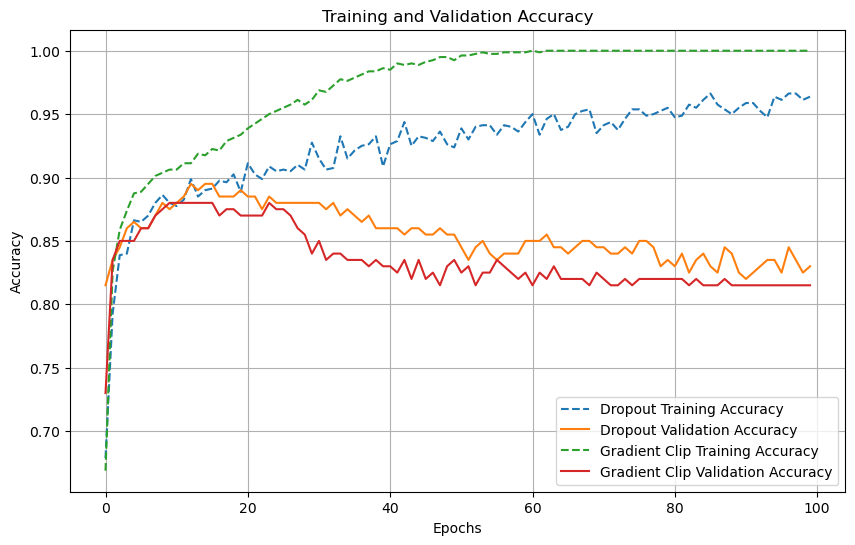

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dropout_history.history['accuracy'], label='Dropout Training Accuracy', linestyle='--')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.plot(clip_history.history['accuracy'], label='Gradient Clip Training Accuracy', linestyle='--')
plt.plot(clip_history.history['val_accuracy'], label='Gradient Clip Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

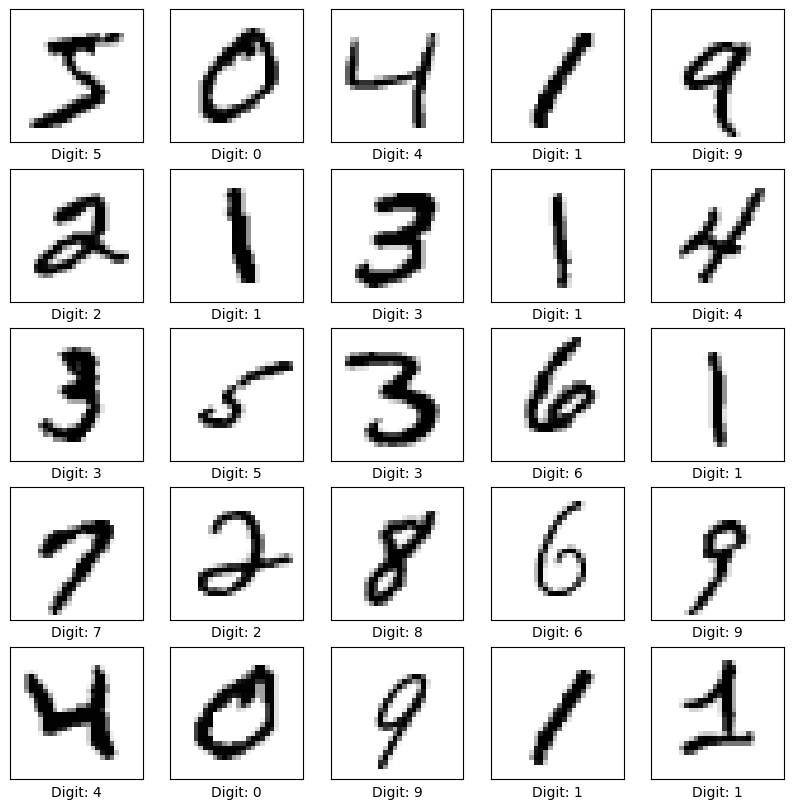

Epoch 1/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9571 - loss: 0.1174 - val_accuracy: 0.9772 - val_loss: 0.0651
Epoch 2/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9810 - loss: 0.0561 - val_accuracy: 0.9818 - val_loss: 0.0524
Epoch 3/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9860 - loss: 0.0405 - val_accuracy: 0.9851 - val_loss: 0.0439
Epoch 4/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9894 - loss: 0.0313 - val_accuracy: 0.9852 - val_loss: 0.0417
Epoch 5/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9879 - val_loss: 0.0388
Epoch 6/20
1875/1875 - 5s - 2ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 7/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9859 - val_loss: 0.0424
Epoch 8/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9862 - val_loss: 0.0463
313/313 - 0s - 1ms/step - accuracy: 0.9879 - loss: 0.0388
Test Loss: 0.0388, Test Accuracy: 0.98

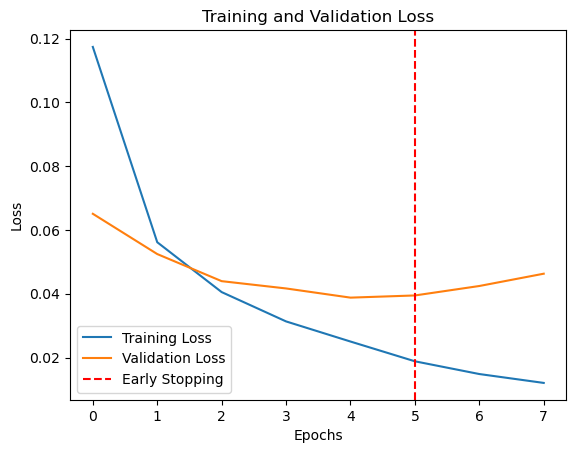

In [7]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test])
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Digit: {y_train[i]}")
plt.show()
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs_parity)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    x_train, y_train_parity,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test_parity),
    callbacks=[early_stopping],
    verbose=2
)
test_loss, test_acc = model.evaluate(x_test, y_test_parity, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
early_stopping_epoch = len(history.history['loss']) - early_stopping.patience
print("\n\nEarly stopping occurred at epoch:", early_stopping_epoch)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.legend()
plt.show()